C:\Users\nrt\AppData\Local\Temp\ipykernel_18344\862025354.py:10: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(f)


Index(['Times', 'Ball', 'AAB', 'Opp'], dtype='object')
Index: 1275
Ball: [13.33, -31.93, 0.13, 0.0, 1, 0]
FCN: [[-18.23  -1.76   0.     0.6    1.  ]
 [ 41.56  -6.11   0.     0.88   2.  ]
 [ 50.72  -7.3    0.     1.04   3.  ]
 [ 44.13  -4.47   0.     0.69   4.  ]
 [ 20.47  -6.23   0.     0.66   6.  ]
 [ 31.59  -5.37   0.     0.76   8.  ]
 [ 43.81   7.96   0.     0.56  11.  ]
 [ 38.22   0.94   0.     1.91  16.  ]
 [ 43.04  -9.33   0.     0.74  17.  ]
 [ 43.47  -0.56   0.     1.91  19.  ]
 [ 38.69 -39.43   0.     0.72  20.  ]]
Opp: [[ 49.6   -2.75   0.     0.45   1.  ]
 [ 43.84  -0.7    0.     1.88   2.  ]
 [ 44.34  -4.52   0.     0.44   3.  ]
 [ 50.13  -7.67   0.     1.1    5.  ]
 [ 41.91  -5.97   0.     1.08   6.  ]
 [ 43.31   0.92   0.     3.84   7.  ]
 [ 35.08  -5.22   0.     0.59   8.  ]
 [ 46.19  -6.46   0.     0.89   9.  ]
 [ 42.23 -28.01   0.     0.21  11.  ]
 [ 43.45  -8.92   0.     1.08  19.  ]
 [ 40.18   0.25   0.     1.27  31.  ]]
146782    [5586.84, 2]
146783    [5586.88, 2]


Text(0.5, 0, 'Speed')

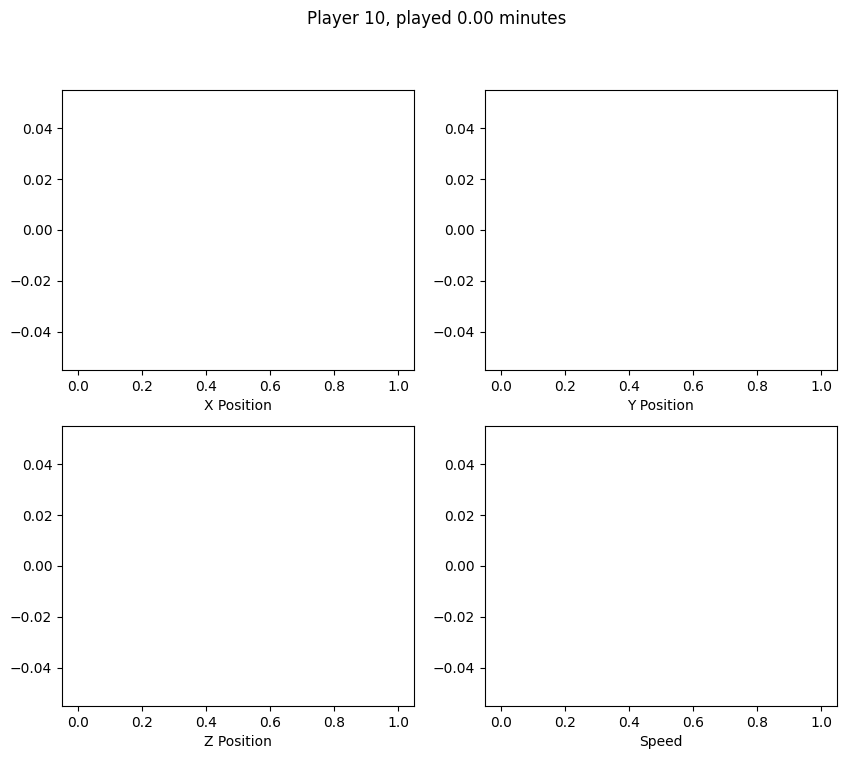

In [19]:
import pickle 
import os
import matplotlib.pyplot as plt
import numpy as np

file = "../RestructuredData_2425/AAB/AllData/Game_AAB_AGF_Score_0_4_Day_2024-08-23Z.pkl"

if os.path.exists(file):
    with open(file, "rb") as f:
        data = pickle.load(f)
else:
    print('meooww')

print(data.columns)

times = data["Times"]
ball = data["Ball"]
FCN = data["AAB"]
opp = data["Opp"]

# Given a time value (e.g., 40), find the index in times and get the corresponding values from ball, FCN, and opp

query_time = 51.0  # or any other time you want to query

# Use np.isclose for robust float comparison

# Extract the first element from each tuple in times
times_x = np.array([t[0] for t in times])

# Use np.isclose for robust float comparison
idxs = np.where(np.isclose(times_x, query_time))[0]
if len(idxs) > 0:
    idx = idxs[0]
    print("Index:", idx)
    print("Ball:", ball[idx])
    print("FCN:", FCN[idx])
    print("Opp:", opp[idx])
else:
    print(f"No entry found for time {query_time}")

player_indxes = [2, 6, 7, 8, 10, 13, 15, 17, 24, 25, 36]
player = 10 #6, 7, 8, 10, 13, 15, 17, 24, 25, 36
player_indx = player_indxes.index(player)

x_pos = [x[player_indx][0] for x in FCN if x[player_indx][4] == player]
y_pos = [x[player_indx][1] for x in FCN if x[player_indx][4] == player]
z_pos = [x[player_indx][2] for x in FCN if x[player_indx][4] == player]
speed = [x[player_indx][3] for x in FCN if x[player_indx][4] == player]

print(times[-10:-1])

#print(x_pos)                                             
#print(len(x_pos))

fig, ax = plt.subplots(2,2, figsize=(10, 8))
fig.suptitle(f"Player {player}, played {len(x_pos)*0.04/60:.2f} minutes")
ax[0, 0].hist(x_pos, color="tab:green")
ax[0, 0].set_xlabel("X Position")
ax[0, 1].hist(y_pos, color="tab:green")
ax[0, 1].set_xlabel("Y Position")
ax[1, 0].hist(z_pos, color="tab:green")
ax[1, 0].set_xlabel("Z Position")
ax[1, 1].hist(speed, color="tab:green")
ax[1, 1].set_xlabel("Speed")


In [2]:
import numpy as np
import pandas as pd

file_xg = "../RestructuredData_2425/AAB/XGdata/XGdata_AAB_AGF_Score_0_4_Day_2024-08-23Z.txt"
if os.path.exists(file_xg):
    with open(file_xg, "rb") as f:
        data_xg = pd.read_csv(file_xg, delimiter=",", header=None)

file_alldata = "../RestructuredData_2425/AAB/Alldata/Game_AAB_AGF_Score_0_4_Day_2024-08-23Z.pkl" 

if os.path.exists(file_alldata):
    with open(file_alldata, "rb") as f:
        data_all = pickle.load(f)

all_times = data_xg[2]*60+data_xg[3]
print(all_times)

# need: goals = data2[10], mTime_masked = np.array(data3["Times"][mask]), mask = played.astype(bool)

goals = data_xg[10]
mask = np.array([x[5] for x in data_all["Ball"]]).astype(bool)

mTime_masked = np.array(data_all["Times"][mask])

final_frames = np.zeros(len(all_times), dtype=int)
k=0
for target_time in all_times:
    if bool(goals[k]):
        final_frames[k] = [i for i, t in enumerate(mTime_masked) if abs(t[0] -target_time) < 1.1][-1]  
    else:
        for i, t in enumerate(mTime_masked):
            if t[0] - target_time > 1:  #So we take the time of the shot according to XG, and take an extra second
                break
        final_frames[k] = i 
    k+=1

first_frames = final_frames - 11 * 25
print(first_frames) #
print(final_frames) # These are the INDICES in the mTime_masked list!!


C:\Users\nrt\AppData\Local\Temp\ipykernel_18344\1531666848.py:13: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data_all = pickle.load(f)


0       59
1      357
2      829
3      936
4      938
5     1147
6     1880
7     2224
8     2225
9     2369
10    2405
11    2574
12    2937
13    3302
14    3721
15    4157
16    4512
17    5059
dtype: int64
[  535  4233  9676 11722 11770 13258 25309 28492 28499 29156 29585 31664
 34108 44417 49642 55092 59997 65142]
[  810  4508  9951 11997 12045 13533 25584 28767 28774 29431 29860 31939
 34383 44692 49917 55367 60272 65417]


In [ ]:
import pickle
import os
import matplotlib.pyplot as plt
from ML_Functions_LoadArrays import *
import numpy as np

def get_frames_xg(mTime_masked, all_times, goals): 
    '''
    Gives the begining and end indices of the 10 seconds before and 1 second after the shot is taken. Indices of the mTime_masked list.

    inputs:
    mTime_masked (np.array): np.array(AllData["Times"][mask]), where mask is if ball is being played
    all_times (np.array): np.array of the times of the shots taken, from the XG data
    goals (np.array): np.array of the goals scored, from the XG data

    outputs:
    first_frames (np.array): np.array of the begining indices of the 10 seconds before the shot is taken
    final_frames (np.array): np.array of the end indices of the 1 second after the shot is taken
    '''
    
    # need: goals = data2[10], mTime_masked = np.array(data3["Times"][mask]), mask = played.astype(bool)

    final_frames = np.zeros(len(all_times), dtype=int)
    k=0
    for target_time in all_times:
        if bool(goals[k]):
            final_frames[k] = [i for i, t in enumerate(mTime_masked) if abs(t[0] -target_time) < 1.1][-1]  
        else:
            for i, t in enumerate(mTime_masked):
                if t[0] - target_time > 1:  #So we take the time of the shot according to XG, and take an extra second
                    break
            final_frames[k] = i 
        k+=1

    first_frames = final_frames - 11 * 25
    return first_frames, final_frames


def scrape_xg(Team , number_of_games) :
    Xg_our_team = pd.DataFrame(columns=['XG', 'Half', 'Time', 'Team', 'Opponent'])
    Xg_opponent = pd.DataFrame(columns=['XG', 'Half', 'Time', 'Team', 'Opponent'])
    NamesXG, NamesSC = SortGames('pippo', Team)
    for igame in range(number_of_games) :
        ########################### All game data #############################
        #mTime, mBall, mFcn, mOpp = SecLoad(Team, NamesSC, igame)
        print("igame", igame, NamesXG[igame])
        ######################### Event data ###################################
        XGNumbers, XGTeam, XGValue, XGHalf, XGMin, XGSec, XGTimes, XGPos1, XGPos2 = (
            MacihneLearning_OptaLoad(Team, NamesXG, igame)
        )
        
        XGTeam = np.array(XGTeam, dtype=str)
        XGValue = np.array(XGValue, dtype=float)
        for ii in range(len(XGValue)) :
            if XGValue[ii] < 0 or XGValue[ii] > 1 or np.isnan(XGValue[ii]):
                print("XGValue < 0 or > 1 or NaN:", XGValue[ii])
                print("XGTeam", XGTeam[ii])
                print("XGHalf", XGHalf[ii])
                print("XGMin", XGMin[ii])
                print("XGSec", XGSec[ii])
        if len(XGValue) == 0:
            print("No XG data for this game: ", NamesXG[igame])
            continue
        XGHalf = np.array(XGHalf, dtype=int)
        XGTimes = np.array(XGTimes, dtype=float)
        mask_team_1 = XGTeam == Team
        mask_team_2 = ~mask_team_1
        Xg_our_team = pd.concat([
            Xg_our_team,
            pd.DataFrame({
            'XG': XGValue[mask_team_1],
            'Half': XGHalf[mask_team_1],
            'Time': XGTimes[mask_team_1],
            'Team': [XGTeam[mask_team_1][0] if mask_team_1.any() else None] * np.sum(mask_team_1),
            'Opponent': [XGTeam[mask_team_2][0] if mask_team_2.any() else None] * np.sum(mask_team_1)
            })
        ], ignore_index=True)
        Xg_opponent = pd.concat([
            Xg_opponent,
            pd.DataFrame({
            'XG': XGValue[mask_team_2],
            'Half': XGHalf[mask_team_2],
            'Time': XGTimes[mask_team_2],
            'Team': [XGTeam[mask_team_2][0] if mask_team_2.any() else None] * np.sum(mask_team_2),
            'Opponent': [XGTeam[mask_team_1][0] if mask_team_1.any() else None] * np.sum(mask_team_2)
            })
        ], ignore_index=True)
    Xg_our_team['XG'] = Xg_our_team['XG'].astype(float , errors='raise')
    Xg_our_team = Xg_our_team[Xg_our_team['XG'] >= 0]
    Xg_our_team['Half'] = Xg_our_team['Half'].astype(int , errors='raise')
    Xg_our_team['Time'] = Xg_our_team['Time'].astype(float , errors='raise')
    Xg_opponent['XG'] = Xg_opponent['XG'].astype(float , errors='raise')
    Xg_opponent = Xg_opponent[Xg_opponent['XG'] >= 0]
    Xg_opponent['Half'] = Xg_opponent['Half'].astype(int , errors='raise')
    Xg_opponent['Time'] = Xg_opponent['Time'].astype(float , errors='raise')
    return Xg_our_team, Xg_opponent


def get_all_xg(Team, verbose=False):
    NamesXG, NamesSC = SortGames('pippo', Team)
    columns = ['XG', 'Time', 'Half','ball_x', 'ball_y', 'ball_z', 'ball_speed']
    for i in range(1, 12):
        columns += [f'us_{i}_x', f'us_{i}_y', f'us_{i}_speed']
    for i in range(1, 12):
        columns += [f'them_{i}_x', f'them_{i}_y', f'them_{i}_speed']

    rows = []
    for igame in range(30) :
        Time, Ball, Us, Them = SecLoad(Team, NamesSC, igame)

        XGNumbers, XGTeam, XGValue, XGHalf, XGMin, XGSec, XGTimes, XGPos1, XGPos2 = (
            MacihneLearning_OptaLoad(Team, NamesXG, igame)
        )

        times_x = np.array([t[0] for t in Time])
        
        for i, t in enumerate(XGTimes):
            if XGTeam[i] == Team and XGValue[i] > 0:
                idxs = np.where(np.isclose(times_x, t, atol=0.05))[0]
                if len(idxs) != 0: #time of XG is 'wrong; 
                    idx = idxs[0]
                    k=0
                    sign = 1
                    passed = True
                    while Ball[idx][5] == 0:
                        idx += sign*1
                        if k == 25:
                            if verbose:
                                print('Cannot find the ball being played in this second')
                            idx = idxs[0]
                            sign = -1
                        elif k > 75:
                            if verbose:
                                print('Nor 2 seconds before, so not including shot')
                            passed = False
                            break
                        k+=1
        
                    if passed:
                        if len(Us[idx]) < 11 or len(Them[idx]) < 11:
                            if verbose:
                                print(f"Red carded in game {igame}") 
                                #If this prints multiple times, it means theres multiple shots where a person is missing
        
                            continue
                        else:
                            row = {
                                'XG': XGValue[i],
                                'Time': XGTimes[i],
                                'Half': XGHalf[i],
                                'ball_x': Ball[idx][0],
                                'ball_y': Ball[idx][1],
                                'ball_z': Ball[idx][2],
                                'ball_speed': Ball[idx][3],
                            }
                            for j in range(11):
                                row[f'us_{j+1}_x'] = Us[idx][j][0]
                                row[f'us_{j+1}_y'] = Us[idx][j][1]
                                row[f'us_{j+1}_speed'] = Us[idx][j][3]
                            for j in range(11):
                                row[f'them_{j+1}_x'] = Them[idx][j][0]
                                row[f'them_{j+1}_y'] = Them[idx][j][1]
                                row[f'them_{j+1}_speed'] = Them[idx][j][3]
                            rows.append(row)

    total_XG_data = pd.DataFrame(rows, columns=columns)
    return total_XG_data



tXG_all = get_all_xg('AAB', verbose=False) #1 team takes +- 1 min 20 sec
print("Team AAB done")

for team in ['AGF', 'BIF', 'FCK', 'FCM', 'FCN', 'LYN', 'RFC', 'SIF', 'SJE', 'VB', 'VFF']:
    tXG = get_all_xg(team) 
    print(f"Team {team} done")
    tXG_all = pd.concat([tXG_all, tXG], ignore_index=True)
    

LEN 30


In [ ]:
tXG_all.to_csv("all_XG_data.csv", index=False)

tXG_all.head(10)## get rid of -1's 


,XG,Time,Half,ball_x,ball_y,ball_z,ball_speed,us_1_x,us_1_y,us_1_speed,...,them_8_speed,them_9_x,them_9_y,them_9_speed,them_10_x,them_10_y,them_10_speed,them_11_x,them_11_y,them_11_speed
0,0.030637,1431,1,32.66,-9.89,0.33,4.31,-20.82,-4.24,1.43,...,2.26,36.98,-15.35,5.93,32.65,-6.48,2.25,16.35,-8.61,2.85
1,0.010763,1736,1,30.53,21.01,0.23,11.99,-17.79,3.83,0.13,...,3.15,39.75,-4.01,2.85,34.33,17.29,1.79,22.88,11.46,3.04
2,0.031976,2055,1,33.08,13.93,0.87,3.07,-17.09,1.48,1.41,...,2.18,44.23,-3.89,2.74,40.77,8.21,2.45,32.60,11.00,4.69
3,0.008036,2069,1,19.40,-4.85,7.84,17.97,-25.90,-2.68,0.13,...,1.09,20.14,-15.32,4.20,11.94,4.54,2.09,-0.67,6.77,1.57
4,0.050775,2362,1,52.07,0.79,2.77,6.34,-20.63,0.49,0.00,...,1.32,41.40,-6.59,1.48,36.68,2.09,1.77,10.10,-13.71,0.93
5,0.140692,3241,2,41.44,1.34,0.91,17.91,-16.31,2.15,0.98,...,3.77,47.81,-0.31,3.74,39.53,13.66,1.55,24.13,8.15,2.48
6,0.044435,3455,2,49.13,-5.16,0.23,13.14,-34.04,-3.44,1.66,...,1.55,32.44,-16.01,4.09,13.55,-0.37,3.13,-2.16,-22.78,1.42
7,0.039328,3736,2,39.12,9.57,0.69,10.93,-30.49,1.28,1.56,...,4.84,38.78,1.38,2.91,38.66,8.32,2.59,36.76,7.05,4.21
8,0.493738,4509,2,47.90,-5.83,0.83,5.33,-17.38,-1.18,0.88,...,0.82,44.72,2.42,1.97,45.85,-5.54,0.57,38.86,-12.42,4.10
9,0.044844,4631,2,33.68,16.74,0.53,16.09,-15.88,-1.36,0.50,...,4.05,38.00,0.99,1.32,40.30,7.86,1.56,39.45,12.75,0.76
